# PCA/Cluster Notebook
[Return to project overview](final_project_overview.ipynb)

### Andrew Larimer, Deepak Nagaraj, Daniel Olmstead, Michael Winton (W207-4-Summer 2018 Final Project)

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from util import our_train_test_split

# set default options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

%matplotlib inline

In [2]:
# Import cleaned dataset
merged_df = pd.read_csv('data_merged/combined_data_2018-07-18.csv')

# Keep the numeric columns.
features_to_keep = [
                    'high_registrations',
                    #'district', 
                    #'zip',
                    'community_school', 
                    'economic_need_index', 
                    #'school_income_estimate',
                    'percent_ell', 
                    'percent_asian', 
                    'percent_black', 
                    'percent_hispanic',
                    'percent_black__hispanic', 
                    'percent_white', 
                    'student_attendance_rate',
                    'percent_of_students_chronically_absent',
                    'rigorous_instruction_percent', 
                    'rigorous_instruction_rating',
                    'collaborative_teachers_percent', 
                    'collaborative_teachers_rating',
                    'supportive_environment_percent', 
                    'supportive_environment_rating',
                    'effective_school_leadership_percent',
                    'effective_school_leadership_rating',
                    'strong_family_community_ties_percent',
                    'strong_family_community_ties_rating', 
                    'trust_percent', 
                    'trust_rating',
                    'student_achievement_rating', 
                    'average_ela_proficiency',
                    'average_math_proficiency', 
                    'grade_7_ela_all_students_tested',
                    'grade_7_ela_4s_all_students',
                    'grade_7_ela_4s_american_indian_or_alaska_native',
                    'grade_7_ela_4s_black_or_african_american',
                    'grade_7_ela_4s_hispanic_or_latino',
                    'grade_7_ela_4s_asian_or_pacific_islander', 
                    'grade_7_ela_4s_white',
                    'grade_7_ela_4s_multiracial',
                    'grade_7_ela_4s_limited_english_proficient',
                    'grade_7_ela_4s_economically_disadvantaged',
                    'grade_7_math_all_students_tested', 
                    'grade_7_math_4s_all_students',
                    'grade_7_math_4s_american_indian_or_alaska_native',
                    'grade_7_math_4s_black_or_african_american',
                    'grade_7_math_4s_hispanic_or_latino',
                    'grade_7_math_4s_asian_or_pacific_islander', 
                    'grade_7_math_4s_white',
                    'grade_7_math_4s_multiracial',
                    'grade_7_math_4s_limited_english_proficient',
                    'grade_7_math_4s_economically_disadvantaged',
                    'number_of_students_english', 
                    'number_of_students_math',
                    'number_of_students_science', 
                    'number_of_students_social_studies',
                    'number_of_classes_english', 
                    'number_of_classes_math',
                    'number_of_classes_science', 
                    'number_of_classes_social_studies',
                    'average_class_size_english', 
                    'average_class_size_math',
                    'average_class_size_science',
                    'average_class_size_social_studies',
                    'school_pupil_teacher_ratio'
                   ]

X = merged_df[features_to_keep]
X.head()

,high_registrations,community_school,economic_need_index,percent_ell,percent_asian,percent_black,percent_hispanic,percent_black__hispanic,percent_white,student_attendance_rate,percent_of_students_chronically_absent,rigorous_instruction_percent,rigorous_instruction_rating,collaborative_teachers_percent,collaborative_teachers_rating,supportive_environment_percent,supportive_environment_rating,effective_school_leadership_percent,effective_school_leadership_rating,strong_family_community_ties_percent,strong_family_community_ties_rating,trust_percent,trust_rating,student_achievement_rating,average_ela_proficiency,average_math_proficiency,grade_7_ela_all_students_tested,grade_7_ela_4s_all_students,grade_7_ela_4s_american_indian_or_alaska_native,grade_7_ela_4s_black_or_african_american,grade_7_ela_4s_hispanic_or_latino,grade_7_ela_4s_asian_or_pacific_islander,grade_7_ela_4s_white,grade_7_ela_4s_multiracial,grade_7_ela_4s_limited_english_proficient,grade_7_ela_4s_economically_disadvantaged,grade_7_math_all_students_tested,grade_7_math_4s_all_students,grade_7_math_4s_american_indian_or_alaska_native,grade_7_math_4s_black_or_african_american,grade_7_math_4s_hispanic_or_latino,grade_7_math_4s_asian_or_pacific_islander,grade_7_math_4s_white,grade_7_math_4s_multiracial,grade_7_math_4s_limited_english_proficient,grade_7_math_4s_economically_disadvantaged,number_of_students_english,number_of_students_math,number_of_students_science,number_of_students_social_studies,number_of_classes_english,number_of_classes_math,number_of_classes_science,number_of_classes_social_studies,average_class_size_english,average_class_size_math,average_class_size_science,average_class_size_social_studies,school_pupil_teacher_ratio
0,1,0,0.480,2,69,1,6,7,24,98.0,2.0,92.0,4.0,91.0,4.0,92.0,4.0,90.0,4.0,76.0,2.0,93.0,4.0,4.0,3.83,4.19,324,226,0,0,0,154,61,0,0,121,324,304,0,0,0,206,83,0,0,166,1052.0,934.0,1385.0,1313.0,42.0,37.0,49.0,46.0,25.047619,25.243243,28.265306,28.543478,17.6
1,1,0,0.311,1,28,7,5,12,54,96.0,7.0,88.0,3.0,89.0,4.0,87.0,3.0,86.0,3.0,73.0,2.0,91.0,3.0,3.0,3.53,3.71,355,175,0,5,4,45,110,11,0,32,352,205,0,5,6,64,119,11,0,44,2710.0,2164.0,1169.0,1553.0,87.0,69.0,37.0,50.0,31.149425,31.362319,31.594595,31.060000,16.5
2,1,0,0.221,2,9,8,12,20,64,96.0,5.0,85.0,NaN,83.0,NaN,87.0,NaN,80.0,2.0,84.0,3.0,90.0,3.0,4.0,3.46,3.70,250,135,0,4,9,16,101,0,0,14,251,170,0,5,6,23,129,0,0,17,868.0,849.0,849.0,849.0,32.0,30.0,30.0,30.0,27.125000,28.300000,28.300000,28.300000,17.2
3,1,0,0.248,2,12,10,19,29,57,97.0,3.0,87.0,4.0,88.0,3.0,89.0,4.0,85.0,3.0,74.0,2.0,90.0,3.0,4.0,3.50,3.49,354,186,0,8,12,27,134,0,0,13,354,188,0,5,10,28,140,0,0,15,1156.0,992.0,1125.0,1092.0,42.0,35.0,39.0,38.0,27.523810,28.342857,28.846154,28.736842,17.2
4,1,0,0.308,1,47,2,7,10,34,98.0,2.0,88.0,3.0,91.0,4.0,90.0,4.0,83.0,3.0,85.0,3.0,92.0,3.0,4.0,3.62,3.94,173,85,0,0,0,45,27,8,0,27,173,130,0,0,0,74,41,11,0,43,NaN,535.0,541.0,NaN,NaN,19.0,18.0,NaN,NaN,28.157895,30.055556,NaN,16.0


In [3]:
y = X['high_registrations']
X = X.drop(['high_registrations'], axis=1)

In [4]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=np.nan, strategy='mean')
X_i = pd.DataFrame(imp.fit_transform(X))
X_i.columns = X.columns
X_i.index = X.index
X_i.head()

,community_school,economic_need_index,percent_ell,percent_asian,percent_black,percent_hispanic,percent_black__hispanic,percent_white,student_attendance_rate,percent_of_students_chronically_absent,rigorous_instruction_percent,rigorous_instruction_rating,collaborative_teachers_percent,collaborative_teachers_rating,supportive_environment_percent,supportive_environment_rating,effective_school_leadership_percent,effective_school_leadership_rating,strong_family_community_ties_percent,strong_family_community_ties_rating,trust_percent,trust_rating,student_achievement_rating,average_ela_proficiency,average_math_proficiency,grade_7_ela_all_students_tested,grade_7_ela_4s_all_students,grade_7_ela_4s_american_indian_or_alaska_native,grade_7_ela_4s_black_or_african_american,grade_7_ela_4s_hispanic_or_latino,grade_7_ela_4s_asian_or_pacific_islander,grade_7_ela_4s_white,grade_7_ela_4s_multiracial,grade_7_ela_4s_limited_english_proficient,grade_7_ela_4s_economically_disadvantaged,grade_7_math_all_students_tested,grade_7_math_4s_all_students,grade_7_math_4s_american_indian_or_alaska_native,grade_7_math_4s_black_or_african_american,grade_7_math_4s_hispanic_or_latino,grade_7_math_4s_asian_or_pacific_islander,grade_7_math_4s_white,grade_7_math_4s_multiracial,grade_7_math_4s_limited_english_proficient,grade_7_math_4s_economically_disadvantaged,number_of_students_english,number_of_students_math,number_of_students_science,number_of_students_social_studies,number_of_classes_english,number_of_classes_math,number_of_classes_science,number_of_classes_social_studies,average_class_size_english,average_class_size_math,average_class_size_science,average_class_size_social_studies,school_pupil_teacher_ratio
0,0.0,0.480,2.0,69.0,1.0,6.0,7.0,24.0,98.0,2.0,92.0,4.000000,91.0,4.000000,92.0,4.000000,90.0,4.0,76.0,2.0,93.0,4.0,4.0,3.83,4.19,324.0,226.0,0.0,0.0,0.0,154.0,61.0,0.0,0.0,121.0,324.0,304.0,0.0,0.0,0.0,206.0,83.0,0.0,0.0,166.0,1052.000000,934.0,1385.0,1313.000000,42.0000,37.0,49.0,46.000000,25.047619,25.243243,28.265306,28.543478,17.6
1,0.0,0.311,1.0,28.0,7.0,5.0,12.0,54.0,96.0,7.0,88.0,3.000000,89.0,4.000000,87.0,3.000000,86.0,3.0,73.0,2.0,91.0,3.0,3.0,3.53,3.71,355.0,175.0,0.0,5.0,4.0,45.0,110.0,11.0,0.0,32.0,352.0,205.0,0.0,5.0,6.0,64.0,119.0,11.0,0.0,44.0,2710.000000,2164.0,1169.0,1553.000000,87.0000,69.0,37.0,50.000000,31.149425,31.362319,31.594595,31.060000,16.5
2,0.0,0.221,2.0,9.0,8.0,12.0,20.0,64.0,96.0,5.0,85.0,2.977778,83.0,3.171111,87.0,2.955457,80.0,2.0,84.0,3.0,90.0,3.0,4.0,3.46,3.70,250.0,135.0,0.0,4.0,9.0,16.0,101.0,0.0,0.0,14.0,251.0,170.0,0.0,5.0,6.0,23.0,129.0,0.0,0.0,17.0,868.000000,849.0,849.0,849.000000,32.0000,30.0,30.0,30.000000,27.125000,28.300000,28.300000,28.300000,17.2
3,0.0,0.248,2.0,12.0,10.0,19.0,29.0,57.0,97.0,3.0,87.0,4.000000,88.0,3.000000,89.0,4.000000,85.0,3.0,74.0,2.0,90.0,3.0,4.0,3.50,3.49,354.0,186.0,0.0,8.0,12.0,27.0,134.0,0.0,0.0,13.0,354.0,188.0,0.0,5.0,10.0,28.0,140.0,0.0,0.0,15.0,1156.000000,992.0,1125.0,1092.000000,42.0000,35.0,39.0,38.000000,27.523810,28.342857,28.846154,28.736842,17.2
4,0.0,0.308,1.0,47.0,2.0,7.0,10.0,34.0,98.0,2.0,88.0,3.000000,91.0,4.000000,90.0,4.000000,83.0,3.0,85.0,3.0,92.0,3.0,4.0,3.62,3.94,173.0,85.0,0.0,0.0,0.0,45.0,27.0,8.0,0.0,27.0,173.0,130.0,0.0,0.0,0.0,74.0,41.0,11.0,0.0,43.0,543.303965,535.0,541.0,425.537079,23.0837,19.0,18.0,17.116854,23.533607,28.157895,30.055556,24.057379,16.0


In [5]:
# Split the full dataset into high and low-registrant
X_pos = X_i[y==1]
X_neg = X_i[y==0]

In [6]:
from functools import partial
from sklearn.model_selection import train_test_split
import util

train_data, test_data, train_labels, test_labels = our_train_test_split(X_i, y, stratify = y)
train_data.head()

,community_school,economic_need_index,percent_ell,percent_asian,percent_black,percent_hispanic,percent_black__hispanic,percent_white,student_attendance_rate,percent_of_students_chronically_absent,rigorous_instruction_percent,rigorous_instruction_rating,collaborative_teachers_percent,collaborative_teachers_rating,supportive_environment_percent,supportive_environment_rating,effective_school_leadership_percent,effective_school_leadership_rating,strong_family_community_ties_percent,strong_family_community_ties_rating,trust_percent,trust_rating,student_achievement_rating,average_ela_proficiency,average_math_proficiency,grade_7_ela_all_students_tested,grade_7_ela_4s_all_students,grade_7_ela_4s_american_indian_or_alaska_native,grade_7_ela_4s_black_or_african_american,grade_7_ela_4s_hispanic_or_latino,grade_7_ela_4s_asian_or_pacific_islander,grade_7_ela_4s_white,grade_7_ela_4s_multiracial,grade_7_ela_4s_limited_english_proficient,grade_7_ela_4s_economically_disadvantaged,grade_7_math_all_students_tested,grade_7_math_4s_all_students,grade_7_math_4s_american_indian_or_alaska_native,grade_7_math_4s_black_or_african_american,grade_7_math_4s_hispanic_or_latino,grade_7_math_4s_asian_or_pacific_islander,grade_7_math_4s_white,grade_7_math_4s_multiracial,grade_7_math_4s_limited_english_proficient,grade_7_math_4s_economically_disadvantaged,number_of_students_english,number_of_students_math,number_of_students_science,number_of_students_social_studies,number_of_classes_english,number_of_classes_math,number_of_classes_science,number_of_classes_social_studies,average_class_size_english,average_class_size_math,average_class_size_science,average_class_size_social_studies,school_pupil_teacher_ratio
421,0.0,0.708,18.0,11.0,48.0,17.0,64.0,24.0,92.0,29.0,86.0,3.0,91.0,3.0,80.0,3.0,86.0,3.0,71.0,2.0,92.0,3.0,3.0,2.32,2.41,165.0,8.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,7.0,178.0,14.0,0.0,2.0,2.0,0.0,6.0,0.0,1.0,14.0,767.0,606.0,765.0,622.000000,37.0,29.0,36.0,28.000000,20.729730,20.896552,21.2500,22.214286,12.5
344,0.0,0.667,2.0,6.0,11.0,77.0,89.0,5.0,97.0,8.0,92.0,4.0,99.0,4.0,96.0,4.0,92.0,4.0,83.0,3.0,98.0,4.0,3.0,3.28,3.47,60.0,22.0,0.0,2.0,18.0,0.0,0.0,0.0,0.0,20.0,60.0,19.0,0.0,2.0,15.0,0.0,0.0,0.0,0.0,17.0,330.0,180.0,180.0,180.000000,13.0,6.0,6.0,6.000000,25.384615,30.000000,30.0000,30.000000,23.9
279,0.0,0.780,14.0,2.0,68.0,28.0,96.0,2.0,90.0,33.0,86.0,3.0,96.0,3.0,83.0,3.0,93.0,4.0,80.0,3.0,95.0,4.0,2.0,1.96,1.95,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.0,327.0,327.0,297.000000,14.0,14.0,12.0,12.000000,22.285714,23.357143,27.2500,24.750000,16.7
244,0.0,0.797,4.0,6.0,77.0,15.0,92.0,1.0,92.0,24.0,89.0,3.0,86.0,3.0,83.0,2.0,80.0,3.0,82.0,2.0,85.0,2.0,2.0,2.35,2.21,57.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,284.0,308.0,154.0,154.000000,13.0,14.0,7.0,7.000000,21.846154,22.000000,22.0000,22.000000,14.0
379,0.0,0.796,15.0,23.0,18.0,56.0,74.0,1.0,92.0,29.0,93.0,3.0,95.0,3.0,80.0,2.0,93.0,4.0,79.0,3.0,91.0,3.0,2.0,2.23,2.17,102.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,101.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,49.0,331.0,383.0,425.537079,2.0,14.0,16.0,17.116854,24.500000,23.642857,23.9375,24.057379,13.3


In [7]:
# Split just the training data into high and low-registrant
train_pos = train_data[train_labels==1]
train_neg = train_data[train_labels==0]

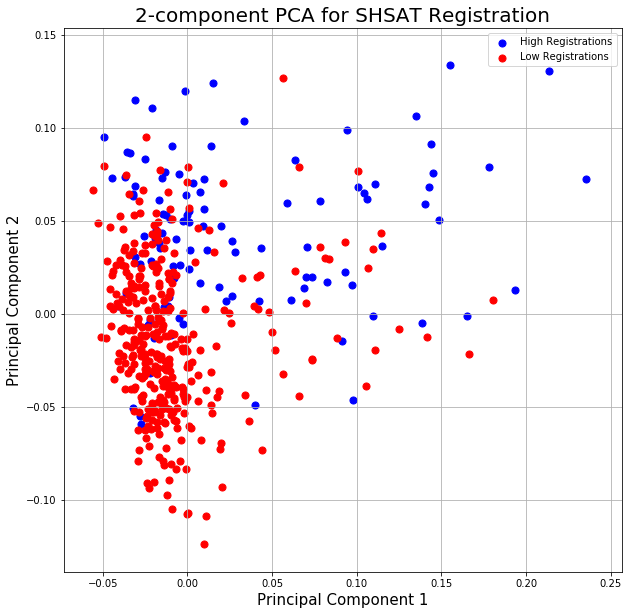

In [8]:
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_i)

pca = SparsePCA(n_components=2, alpha=2, random_state=207)
pc = pca.fit_transform(scaled_X)
pcdf = pd.DataFrame(data = pc, columns=['pc1', 'pc2'])

# Attach labels
pcdf = pd.concat([pcdf, y], axis=1)

# Plot the Results
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2-component PCA for SHSAT Registration', fontsize=20)
ax.scatter(pcdf.loc[pcdf['high_registrations']==1, 'pc1'], pcdf.loc[pcdf['high_registrations']==1, 'pc2'], c='blue', s=50)
ax.scatter(pcdf.loc[pcdf['high_registrations']==0, 'pc1'], pcdf.loc[pcdf['high_registrations']==0, 'pc2'], c='red', s=50)
ax.legend(['High Registrations', 'Low Registrations'])
ax.grid()

Accuracy: 77.42%


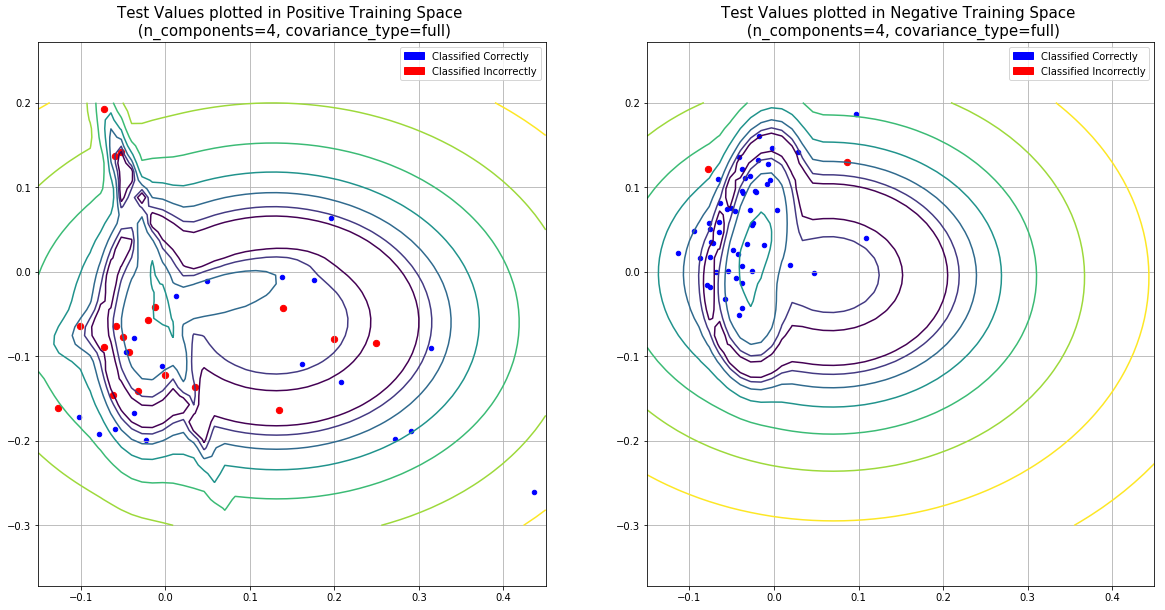

In [9]:
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm

scaled_train_X = scaler.fit_transform(train_data)
scaled_test_X = scaler.fit_transform(test_data)

pca = SparsePCA(n_components=2, alpha=2, random_state=207)
pc = pca.fit_transform(scaled_train_X)

# Filter out the positive (poisonous) results
pc_pos = pc[train_labels==1]
# Filter out the negative (non-poisonous) results
pc_neg = pc[train_labels==0]

# Fit a GMM for the positive examples
clfpos = GaussianMixture(n_components=4, covariance_type='full', random_state=207)
clfpos.fit(pc_pos)
# Fit a GMM for the negative examples
clfneg = GaussianMixture(n_components=4, covariance_type='full', random_state=207)
clfneg.fit(pc_neg)

# Run PCA on the test answer
pca_test = pca.transform(scaled_test_X)
# Filter out the positive and negative results from the test data
pca_test_pos = pca_test[test_labels==1]
pca_test_neg = pca_test[test_labels==0]
# Obtain the log-likelihood score for each result in the positive and negative result set
score1 = clfpos.score_samples(pca_test)
score0 = clfneg.score_samples(pca_test)
# Compare site of likelihood to create a results array that looks like the labels array, and compare those for accuracy
print("Accuracy: {:.2f}%".format(np.mean((score1 >= score0)==test_labels)*100))

# The rest of this is to generate the plots
# Create a result set like the test_labels array
predicted_result = (score1 >= score0).astype(int)
# Create sub-arrays for all the correct and incorrect answers
pos_correct = np.logical_and(test_labels==1, predicted_result==1) # True Positives
neg_correct = np.logical_and(test_labels==0, predicted_result==0) # True Negatives
pos_wrong = np.logical_and(test_labels==0, predicted_result==1) # False Positives
neg_wrong = np.logical_and(test_labels==1, predicted_result==0) # False NEgatives

# Compare each of these to the PCA resultset
pca_pred_pos_y = pca_test[pos_correct]
pca_pred_neg_y = pca_test[neg_correct]
pca_pred_pos_n = pca_test[pos_wrong]
pca_pred_neg_n = pca_test[neg_wrong]

# display predicted scores by the model as a contour plot
fig = plt.figure(figsize=(20,10))
red_patch = mpatches.Patch(color='red', label='Classified Incorrectly')
blue_patch = mpatches.Patch(color='blue', label='Classified Correctly')
rangex = np.linspace(-.15, .45)
rangey = np.linspace(-.3, .2)
rangeX, rangeY = np.meshgrid(rangex, rangey)
XX = np.array([rangeX.ravel(), rangeY.ravel()]).T

# Plot the positive results
Z = abs(clfpos.score_samples(XX))
Z = Z.reshape(rangeX.shape)

ax = fig.add_subplot(1,2,1)
ax.contour(rangeX, rangeY, Z, norm=LogNorm(vmin=1.0, vmax=20.0), levels=np.logspace(0, 2, 10))
ax.set_title('Test Values plotted in Positive Training Space \n (n_components=4, covariance_type=full)', fontsize=15)
ax.scatter(pca_pred_pos_n[:, 0], pca_pred_pos_n[:, 1], 40, c='red')
ax.scatter(pca_pred_pos_y[:, 0], pca_pred_pos_y[:, 1], 20, c='blue')
ax.axis('equal')
ax.legend(handles=[blue_patch, red_patch])
ax.grid()

# Plot the negative results
Z2 = abs(clfneg.score_samples(XX))
Z2 = Z2.reshape(rangeX.shape)

ax = fig.add_subplot(1,2,2)
ax.contour(rangeX, rangeY, Z2, norm=LogNorm(vmin=1.0, vmax=20.0), levels=np.logspace(0, 2, 10))
ax.set_title('Test Values plotted in Negative Training Space \n (n_components=4, covariance_type=full)', fontsize=15)
ax.scatter(pca_pred_neg_n[:, 0], pca_pred_neg_n[:, 1], 40, c='red')
ax.scatter(pca_pred_neg_y[:, 0], pca_pred_neg_y[:, 1], 20, c='blue')
ax.legend(handles=[blue_patch, red_patch])
ax.axis('equal')
ax.grid()    

plt.show()